# Ensemble Techniques - Project

#### The data set is collected from the uci machine learning repository. The link is given below:
 https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/
#### dataset is converted to csv format and stored as "parkinsons_data".

In [169]:
#Import all the necessary modules
import numpy as np
import pandas as pd
%matplotlib inline

### Load the dataset

In [170]:
park_df=pd.read_csv("parkinsons_data.csv")
park_df.head(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### Eyeball the data - Number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset

In [171]:
park_df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [172]:
park_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

In [173]:
park_df.shape

(195, 24)

In [174]:
park_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [175]:
# check nan 
park_df.isin([np.nan]).any()

name                False
MDVP:Fo(Hz)         False
MDVP:Fhi(Hz)        False
MDVP:Flo(Hz)        False
MDVP:Jitter(%)      False
MDVP:Jitter(Abs)    False
MDVP:RAP            False
MDVP:PPQ            False
Jitter:DDP          False
MDVP:Shimmer        False
MDVP:Shimmer(dB)    False
Shimmer:APQ3        False
Shimmer:APQ5        False
MDVP:APQ            False
Shimmer:DDA         False
NHR                 False
HNR                 False
status              False
RPDE                False
DFA                 False
spread1             False
spread2             False
D2                  False
PPE                 False
dtype: bool

### Using univariate & bivariate analysis to check the individual attributes for their basic statistics such as central values, spread, tails etc. What are your observations

In [176]:
park_df.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


Text(0.5,1,'Correlation Matrix')

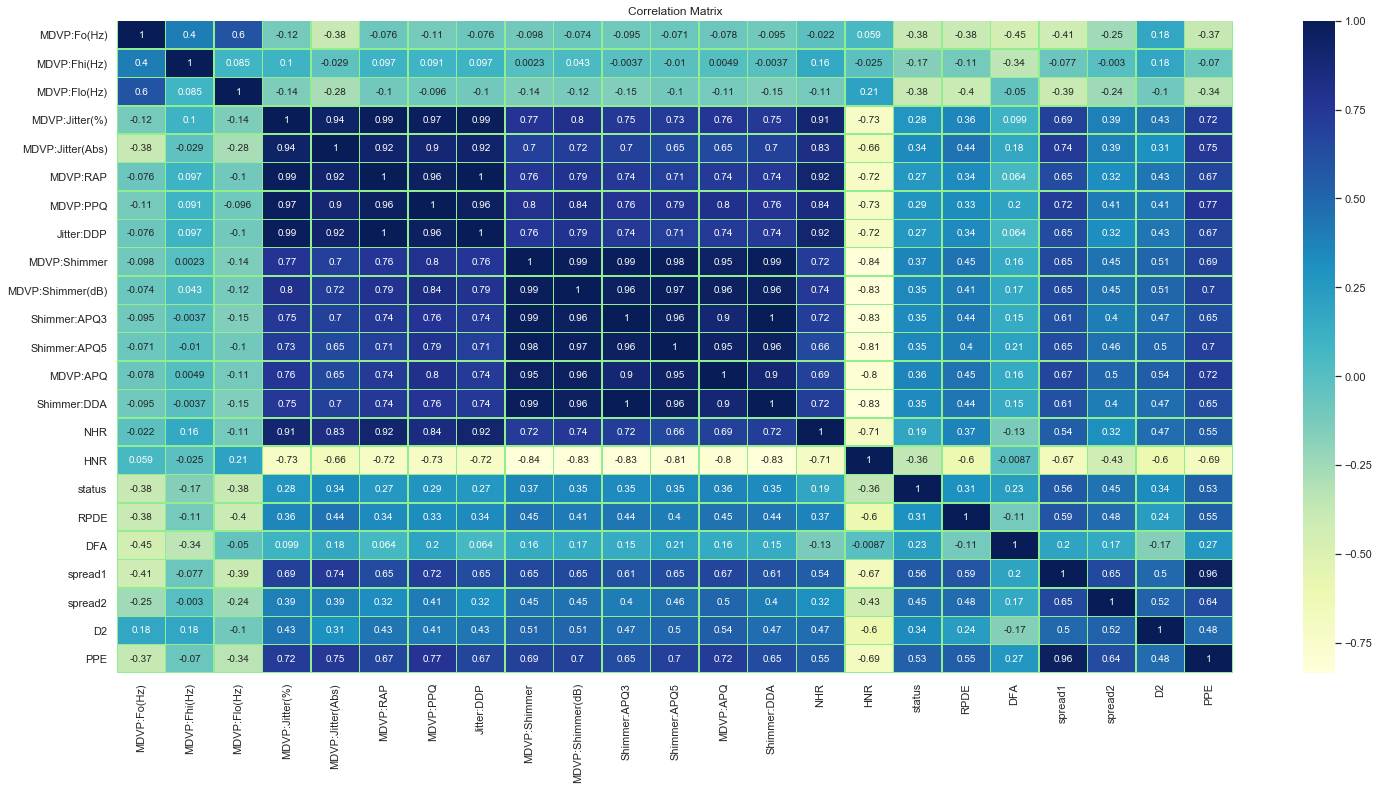

In [177]:
plt.figure(figsize=(25, 12))
sns.heatmap(park_df.corr(),cmap='YlGnBu', linewidths=0.5,vmax=1.0, 
            linecolor='lightgreen', annot=True)
plt.title('Correlation Matrix')

In [178]:
# Filter for correlation value 
# Absolute correlation of independent variables with 'status' i.e. the target variable
absCorrwithDep = []
allVars = park_df.drop(['name','status'], axis = 1).columns

for var in allVars:
    absCorrwithDep.append(abs(park_df['status'].corr(park_df[var])))

display(pd.DataFrame([allVars, absCorrwithDep], index = ['columnName', 'Correlation']).T.\
        sort_values('Correlation', ascending = False))

,columnName,Correlation
18,spread1,0.564838
21,PPE,0.531039
19,spread2,0.454842
0,MDVP:Fo(Hz),0.383535
2,MDVP:Flo(Hz),0.3802
8,MDVP:Shimmer,0.36743
12,MDVP:APQ,0.364316
15,HNR,0.361515
11,Shimmer:APQ5,0.351148
9,MDVP:Shimmer(dB),0.350697


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


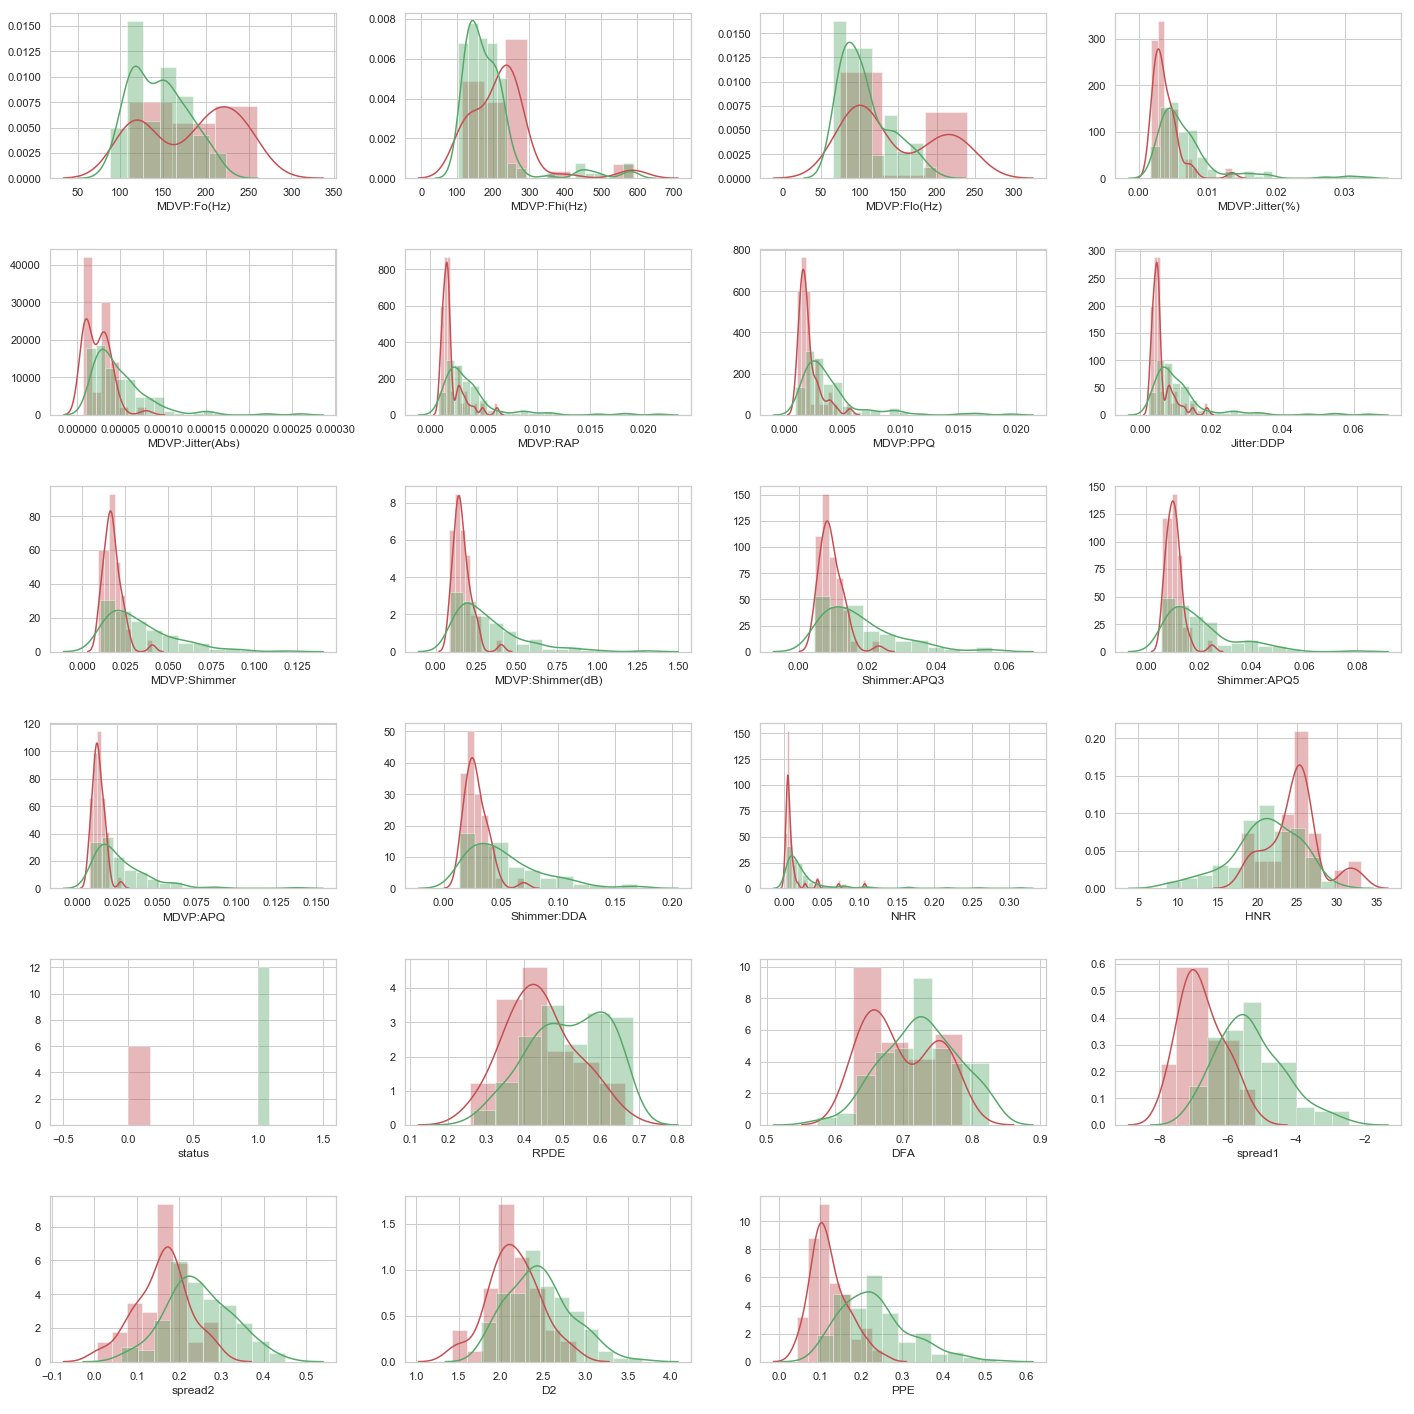

In [179]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(20,20)) 
temp=park_df.columns.drop("name")
#print (temp)
for col in temp:
    index = park_df.columns.get_loc(col)
    #print(index)
    plt.subplot(6,4,index)
    sns.distplot( park_df[park_df.status == 0][col], color = 'r')
    sns.distplot( park_df[park_df.status == 1][col], color = 'g')
    plt.xlabel("{}\n".format(col))
plt.tight_layout(pad=2.0)    

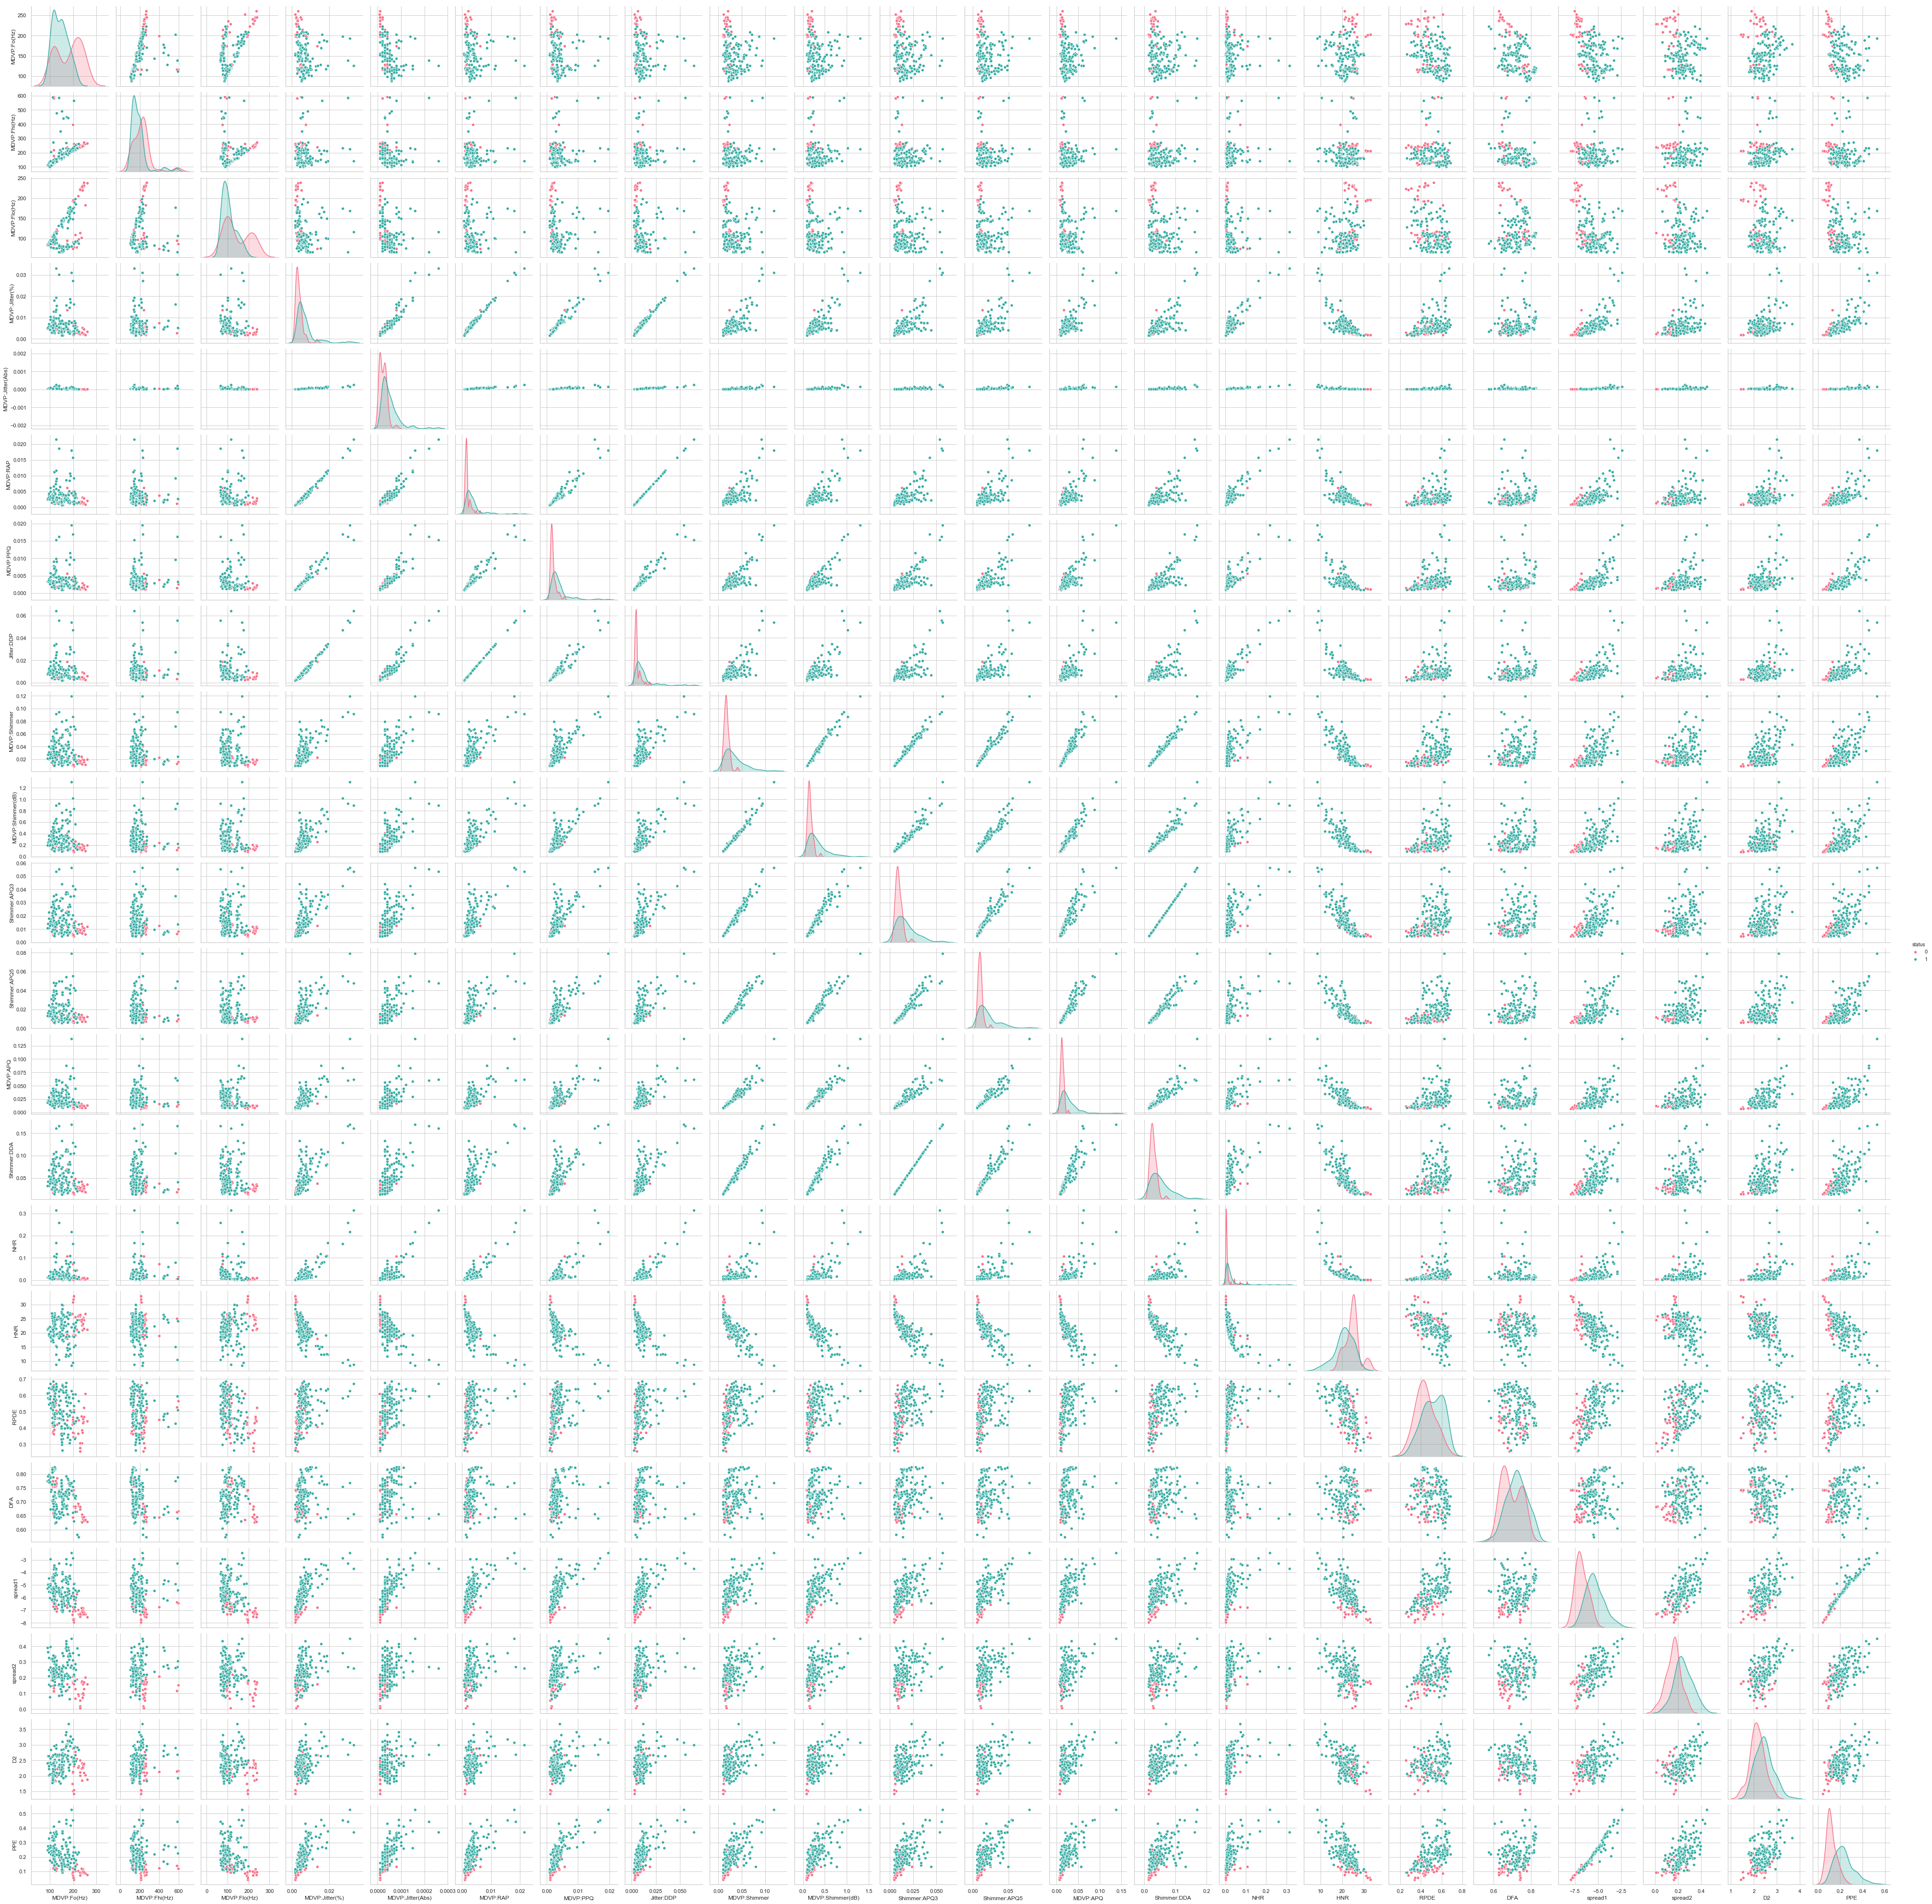

In [180]:
sns.pairplot(park_df,hue='status',palette='husl')

1    147
0     48
Name: status, dtype: int64

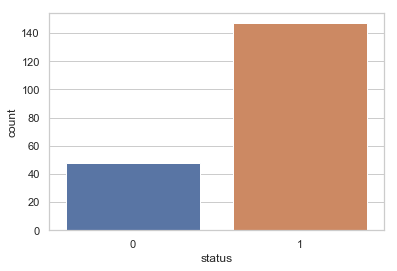

In [181]:
#Counts number of classes
sns.countplot(x="status", data=park_df)
park_df.loc[:,'status'].value_counts()

In [182]:
park_df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

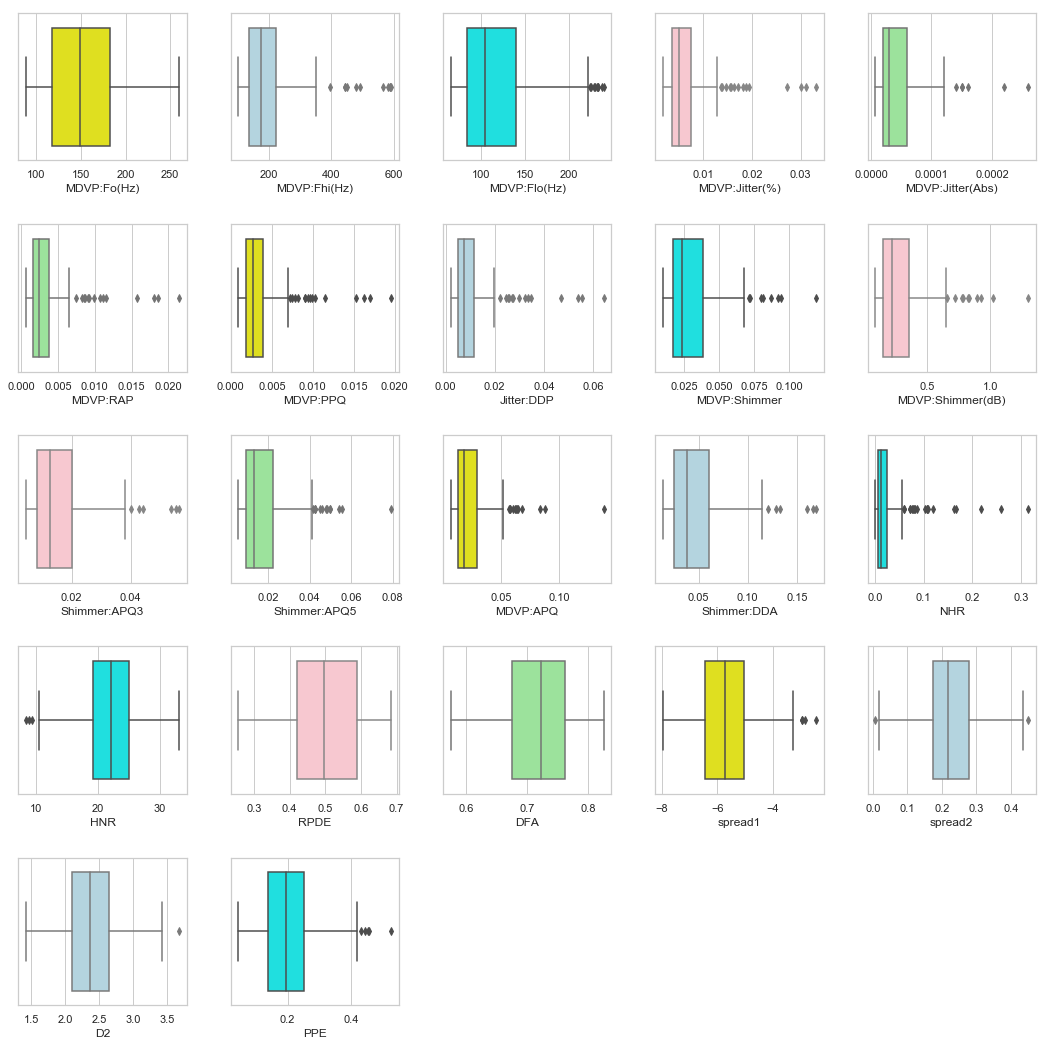

In [183]:
#Boxplot

plt.figure(figsize=(15,15))
sns.set(style="whitegrid")

plt.subplot(5,5,1)
sns.boxplot(park_df['MDVP:Fo(Hz)'],color='yellow')

plt.subplot(5,5,2)
sns.boxplot(park_df['MDVP:Fhi(Hz)'],color='lightblue')

plt.subplot(5,5,3)
sns.boxplot(park_df['MDVP:Flo(Hz)'],color='cyan')

plt.subplot(5,5,4)
sns.boxplot(park_df['MDVP:Jitter(%)'],color='pink')

plt.subplot(5,5,5)
sns.boxplot(park_df['MDVP:Jitter(Abs)'],color='lightgreen')

#second row
plt.subplot(5,5,6)
sns.boxplot(park_df['MDVP:RAP'],color='lightgreen')

plt.subplot(5,5,7)
sns.boxplot(park_df['MDVP:PPQ'],color='yellow')

plt.subplot(5,5,8)
sns.boxplot(park_df['Jitter:DDP'],color='lightblue')

plt.subplot(5,5,9)
sns.boxplot(park_df['MDVP:Shimmer'],color='cyan')

plt.subplot(5,5,10)
sns.boxplot(park_df['MDVP:Shimmer(dB)'],color='pink')

#third row
plt.subplot(5,5,11)
sns.boxplot(park_df['Shimmer:APQ3'],color='pink')

plt.subplot(5,5,12)
sns.boxplot(park_df['Shimmer:APQ5'],color='lightgreen')

plt.subplot(5,5,13)
sns.boxplot(park_df['MDVP:APQ'],color='yellow')

plt.subplot(5,5,14)
sns.boxplot(park_df['Shimmer:DDA'],color='lightblue')

plt.subplot(5,5,15)
sns.boxplot(park_df['NHR'],color='cyan')

#fourth row
plt.subplot(5,5,16)
sns.boxplot(park_df['HNR'],color='cyan')

plt.subplot(5,5,17)
sns.boxplot(park_df['RPDE'],color='pink')

plt.subplot(5,5,18)
sns.boxplot(park_df['DFA'],color='lightgreen')

plt.subplot(5,5,19)
sns.boxplot(park_df['spread1'],color='yellow')

plt.subplot(5,5,20)
sns.boxplot(park_df['spread2'],color='lightblue')

#fifth row
plt.subplot(5,5,21)
sns.boxplot(park_df['D2'],color='lightblue')

plt.subplot(5,5,22)
sns.boxplot(park_df['PPE'],color='cyan')

plt.tight_layout(pad=2.0)

#### UNIVARIATE ANALYSIS:

MDVP:Fo(Hz): has a symmetric distribution, as per the classes segregation, the central                            values have different values and thus could be apart from each other
MDVP:Fhi(Hz): there are outliers in the dataset which is shown by the boxplot 
that the spread is making and the central values are apart so it could serve as a good predictor
if the outlier treatment can be made
MDVP:Flo(Hz): has a very huge amount of outliers which could affect the model type, the
central values are overlapping so it might not be a very good predictor variable to use the classes
MDVP:Jitter(%): There are outliers in the dataset, as we see small Gaussians which the outliers 
seem to be cluttered with each other
MDVP:Jitter(Abs): There are multiple outliers in the data which can be seen in the form of Gaussians
that the outliers are making
MDVP:RAP: See a very sharp central values in one class of distribution  and the other cental values
seem to be overlapping with each other
RPDE: Variable has segregated class and could serve as a good predictor of the classes
DFA: Have different central values but some portions of other classes have been overlapping which 
might have a distribution clashes as we move forward
Spread-1 and Spread-2 have very different central values and thus could be strong predictors to see
differentiate the classes with each other
D2 and PPE could also be good predictors of the classes as the central values have different values

#### BIVARIATE ANALYSIS:

MDVP:Fo(Hz) has a very weak correlation with all the variables expect for 	MDVP:Flo(Hz) for which the correlation is slightly greater than 0.5
MDVP:Fhi(Hz): Has a very weak correlation with all the other variables
MDVP:Jitter(%) and MDVP:Jitter(Abs) share a very strong correlation(close to 1)
MDVP:RAP and MDVP:Jitter(%): Have a very strong correlation(close to 0.99)
Almost all the variables have a very strong correlation with MDVP:Jitter(%) except a few variables
PPE has considerably strong correlation with many variables and this correlation is not a good indication

### Split the dataset into training and test set in the ratio of 70:30 (Training:Test).

In [184]:
# Separating dependent and independent variables
X = park_df.drop(['name','status'], axis = 1)
y = park_df['status']
X.head(5)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [185]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =1,stratify=y)
print(X_train.shape,X_test.shape)

(136, 22) (59, 22)


### Create a decision tree model using “entropy” method of reducing the entropy and fit it to training data.

In [186]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a crosstab.

In [187]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix,classification_report

#Testing The Model:
y_pred=dt_model.predict(X_test)

In [188]:
#accuracy achieved
accuracy = accuracy_score(y_test, y_pred)
print('\nAccuracy Score test:\n', accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix:\n', cm)


Accuracy Score test:
 0.864406779661017

Confusion Matrix:
 [[11  4]
 [ 4 40]]


In [189]:
cr=metrics.classification_report(y_test,y_pred)
print(cr)

             precision    recall  f1-score   support

          0       0.73      0.73      0.73        15
          1       0.91      0.91      0.91        44

avg / total       0.86      0.86      0.86        59



### Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help?

In [190]:
from sklearn.model_selection import train_test_split, GridSearchCV
parameter={'max_depth':np.arange(1,20)}
GS=GridSearchCV(dt_model,parameter,cv=10)

In [191]:
GS.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [192]:
GS.best_params_

{'max_depth': 14}

In [193]:
GS.best_score_

0.8676470588235294

In [194]:
GS.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=14,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

###### Grid search found best score as  0.8676470588235294 with max_depth = 6 and min_samples_leaf = 1

###### Model accuracy got increased after  tunning these parameters by finding best estimator architecture with  Grid search

### Next implement the Random Forest model and find the accuracy

In [195]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=50,criterion='entropy' )
rf_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [196]:
y_pred_rf = rf_model.predict(X_test)

#accuracy achieved
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print('\nAccuracy Score test:\n', accuracy_rf)

# Confusion Matrix
print('\nConfusion Matrix:')
confusion_matrix(y_test,y_pred_rf)


Accuracy Score test:
 0.9491525423728814

Confusion Matrix:


array([[13,  2],
       [ 1, 43]], dtype=int64)

###### With RandomForest implemetation the model has acheived the Accuracy = 0.9491525423728814.  
###### Model accuracy has increased 

# END